In [2]:
from tensorflow.keras.layers import (Input, Dense,Activation, BatchNormalization, Conv1D, Conv2D,MaxPooling1D, MaxPooling2D, LSTM, GRU, Embedding, Bidirectional,
                         Concatenate,Dropout, Embedding,Convolution1D, Flatten,Layer)
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# Performance:
from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
# import pydot_ng as pydot
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical as labelEncoding   # Usages: Y = labelEncoding(Y, dtype=int)
from tensorflow.keras.utils import plot_model,model_to_dot  

from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score, roc_curve, auc)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
from layers import MultiHeadAttention,Attention,AttLayer
from scipy import interp

import numpy as np
my_seed = 42
np.random.seed(my_seed)
import random 
random.seed(my_seed)
import tensorflow as tf
tf.random.set_seed(my_seed)

In [3]:
def lossPlot(results):
    plt.title(label='Loss: Training and Validation')
    plt.plot(results.history['loss'], label='Training Loss')
    plt.plot(results.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#end-def

def accuracyPlot(results):
    plt.title(label='Accuracy: Training and Validation')
    plt.plot(results.history['accuracy'], label='Training Accuracy')
    plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def rocPlot(TPR, meanFPR):
    plt.plot([0,1], [0,1],linestyle = '--',lw = 2,color = 'black')
    meanTPR = np.mean(TPR, axis=0)
    meanAUC = auc(meanFPR, meanTPR)
    plt.plot(meanFPR, meanTPR, color='blue',
            label=r'Mean ROC (AUC = %0.4f )' % (meanAUC),lw=2, alpha=1)

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic Curve (ROC Curve)')
    plt.legend(loc="lower right")
    plt.savefig('ROC-240.png')
    plt.show()

In [4]:
def model2():
    in_put = Input(shape = (95,150))
    a = Convolution1D(64,3,activation='relu',padding='valid')(in_put)
    a = BatchNormalization()(a)
#     a = MaxPooling1D(pool_size=3, strides=1,padding='valid')(a)
    b = Convolution1D(128,3,activation='relu',padding='valid')(a)
    b = BatchNormalization()(b)
    c = Convolution1D(256,3,activation='relu',padding='valid')(b)
    c = MaxPooling1D(pool_size=3, strides=1,padding='valid')(c)
    c = Dropout(0.2)(c)
    d = Bidirectional(LSTM(128,return_sequences=True))(c)
    d = MultiHeadAttention(head_num=64, activation='relu', use_bias=True, 
                                return_multi_attention=False, name='Multi-Head-Attention')(d)
    head = Flatten()(d)
#     e = Dropout(0.5)(head)
    e = Dense(128, activation='relu', name='FC3')(head)
    e = Dropout(rate=0.5)(e)
    e = Dense(64, activation='relu', name='FC2')(e)
    
    e = Dense(32, activation='relu', name='FC4')(e)
    
    output = Dense(2, activation='softmax', name='Output')(e)

    return Model(inputs = [in_put],outputs = [output])

def model1():
    in_put = Input(shape = (97,150))
    a = Convolution1D(128,3,activation='relu',padding='valid')(in_put)
    a = BatchNormalization()(a)
#     a = MaxPooling1D(pool_size=3, strides=1,padding='valid')(a)
    b = Convolution1D(128,3,activation='relu',padding='valid')(a)
    b = BatchNormalization()(b)
    c = Convolution1D(256,3,activation='relu',padding='valid')(b)
    c = MaxPooling1D(pool_size=3, strides=1,padding='valid')(c)
    c = Dropout(0.2)(c)
    d = Bidirectional(LSTM(128,return_sequences=True))(c)
    d = MultiHeadAttention(head_num=64, activation='relu', use_bias=True, 
                                return_multi_attention=False, name='Multi-Head-Attention')(d)
    head = Flatten()(d)
#     e = Dropout(0.5)(head)
    e = Dense(128, activation='relu', name='FC3')(head)
    e = Dropout(rate=0.5)(e)
    e = Dense(64, activation='relu', name='FC2')(e)
    
    e = Dense(32, activation='relu', name='FC4')(e)
    
    output = Dense(2, activation='softmax', name='Output')(e)

    return Model(inputs = [in_put],outputs = [output])

# def model1():
#     in_put = Input(shape = (97,100))
#     a = Convolution1D(128,3,activation='relu',padding='valid')(in_put)
#     a = BatchNormalization()(a)
# #     a = MaxPooling1D(pool_size=3, strides=1,padding='valid')(a)
#     b = Convolution1D(128,3,activation='relu',padding='valid')(a)
#     b = BatchNormalization()(b)
#     c = Convolution1D(256,3,activation='relu',padding='valid')(b)
#     c = MaxPooling1D(pool_size=3, strides=1,padding='valid')(c)
#     c = Dropout(0.2)(c)
#     d = Bidirectional(LSTM(128,return_sequences=True))(c)
# #     d = MultiHeadAttention(head_num=64, activation='relu', use_bias=True, 
# #                                 return_multi_attention=False, name='Multi-Head-Attention')(d)
#     head = Flatten()(d)
# #     e = Dropout(0.5)(head)
#     e = Dense(128, activation='relu', name='FC3')(head)
#     e = Dropout(rate=0.5)(e)
#     e = Dense(64, activation='relu', name='FC2')(e)
    
#     e = Dense(32, activation='relu', name='FC4')(e)
    
#     output = Dense(2, activation='softmax', name='Output')(e)

#     return Model(inputs = [in_put],outputs = [output])

# def model1():
#     in_put = Input(shape = (97,150))
#     a = Convolution1D(128,3,activation='relu',padding='valid')(in_put)
#     a = BatchNormalization()(a)
# #     a = MaxPooling1D(pool_size=3, strides=1,padding='valid')(a)
#     b = Convolution1D(128,3,activation='relu',padding='valid')(a)
#     b = BatchNormalization()(b)
#     c = Convolution1D(256,3,activation='relu',padding='valid')(b)
#     c = MaxPooling1D(pool_size=3, strides=1,padding='valid')(c)
#     c = Dropout(0.2)(c)
#     d = Bidirectional(LSTM(128,return_sequences=True))(c)
# #     d = MultiHeadAttention(head_num=64, activation='relu', use_bias=True, 
# #                                 return_multi_attention=False, name='Multi-Head-Attention')(d)
#     d = AttLayer(256)(d)
#     head = Flatten()(d)
# #     e = Dropout(0.5)(head)
#     e = Dense(128, activation='relu', name='FC3')(head)
#     e = Dropout(rate=0.5)(e)
#     e = Dense(64, activation='relu', name='FC2')(e)
    
#     e = Dense(32, activation='relu', name='FC4')(e)
    
#     output = Dense(2, activation='softmax', name='Output')(e)

#     return Model(inputs = [in_put],outputs = [output])

In [5]:
model = model1()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 97, 150)]         0         
                                                                 
 conv1d (Conv1D)             (None, 95, 128)           57728     
                                                                 
 batch_normalization (BatchN  (None, 95, 128)          512       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 93, 128)           49280     
                                                                 
 batch_normalization_1 (Batc  (None, 93, 128)          512       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 91, 256)           98560 

Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.6068 - accuracy: 0.6447
Epoch 1: val_accuracy improved from -inf to 0.56314, saving model to my_model2/our_model_4X_test_mul\firstModel1.tf
97/97 [==============================] - 14s 55ms/step - loss: 0.6068 - accuracy: 0.6447 - val_loss: 0.9176 - val_accuracy: 0.5631
Epoch 2/100
96/97 [============================>.] - ETA: 0s - loss: 0.3652 - accuracy: 0.8558
Epoch 2: val_accuracy improved from 0.56314 to 0.77706, saving model to my_model2/our_model_4X_test_mul\firstModel1.tf
97/97 [==============================] - 4s 46ms/step - loss: 0.3644 - accuracy: 0.8557 - val_loss: 0.5350 - val_accuracy: 0.7771
Epoch 3/100
96/97 [============================>.] - ETA: 0s - loss: 0.2993 - accuracy: 0.8831
Epoch 3: val_accuracy improved from 0.77706 to 0.89304, saving model to my_model2/our_model_4X_test_mul\firstModel1.tf
97/97 [==============================] - 5s 50ms/step - loss: 0.2979 - accuracy: 0.8840 - val_loss: 

97/97 [==============================] - ETA: 0s - loss: 0.1146 - accuracy: 0.9504
Epoch 28: val_accuracy did not improve from 0.92655
97/97 [==============================] - 8s 86ms/step - loss: 0.1146 - accuracy: 0.9504 - val_loss: 0.3457 - val_accuracy: 0.8853
Epoch 29/100
97/97 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9607
Epoch 29: val_accuracy did not improve from 0.92655
97/97 [==============================] - 8s 86ms/step - loss: 0.0989 - accuracy: 0.9607 - val_loss: 0.3039 - val_accuracy: 0.9124
Epoch 30/100
97/97 [==============================] - ETA: 0s - loss: 0.0987 - accuracy: 0.9578
Epoch 30: val_accuracy did not improve from 0.92655
97/97 [==============================] - 8s 85ms/step - loss: 0.0987 - accuracy: 0.9578 - val_loss: 0.2647 - val_accuracy: 0.9214
Epoch 31/100
96/97 [============================>.] - ETA: 0s - loss: 0.0905 - accuracy: 0.9635
Epoch 31: val_accuracy did not improve from 0.92655
97/97 [========================

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:86: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9471102136252524
Accuracy: [0.8371133804321289]
Sensitivity:  [0.9092783505154639]
Specificity:  [0.7649484536082474]
MCC: [0.6813609076116425]
Precision:  [0.7945945945945946]
Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.5593 - accuracy: 0.6846
Epoch 1: val_accuracy improved from -inf to 0.82088, saving model to my_model2/our_model_4X_test_mul\firstModel2.tf
97/97 [==============================] - 9s 60ms/step - loss: 0.5593 - accuracy: 0.6846 - val_loss: 0.3997 - val_accuracy: 0.8209
Epoch 2/100
96/97 [============================>.] - ETA: 0s - loss: 0.3456 - accuracy: 0.8590
Epoch 2: val_accuracy did not improve from 0.82088
97/97 [==============================] - 5s 48ms/step - loss: 0.3489 - accuracy: 0.8582 - val_loss: 0.4924 - val_accuracy: 0.7784
Epoch 3/100
96/97 [============================>.] - ETA: 0s - loss: 0.2925 - accuracy: 0.8799
Epoch 3: val_accuracy did not improve from 0.82088
97/97 [==============================] - 5s 49ms/step

97/97 [==============================] - 5s 48ms/step - loss: 0.1065 - accuracy: 0.9588 - val_loss: 0.2176 - val_accuracy: 0.9201
Epoch 29/100
97/97 [==============================] - ETA: 0s - loss: 0.1057 - accuracy: 0.9588
Epoch 29: val_accuracy did not improve from 0.92010
97/97 [==============================] - 5s 51ms/step - loss: 0.1057 - accuracy: 0.9588 - val_loss: 0.5563 - val_accuracy: 0.8531
Epoch 30/100
97/97 [==============================] - ETA: 0s - loss: 0.1034 - accuracy: 0.9575
Epoch 30: val_accuracy did not improve from 0.92010
97/97 [==============================] - 5s 49ms/step - loss: 0.1034 - accuracy: 0.9575 - val_loss: 0.5113 - val_accuracy: 0.8724
Epoch 31/100
97/97 [==============================] - ETA: 0s - loss: 0.1097 - accuracy: 0.9575
Epoch 31: val_accuracy did not improve from 0.92010
97/97 [==============================] - 5s 49ms/step - loss: 0.1097 - accuracy: 0.9575 - val_loss: 0.4840 - val_accuracy: 0.8686
Epoch 32/100
97/97 [================

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:86: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9593814432989691
Accuracy: [0.8371133804321289, 0.8865979313850403]
Sensitivity:  [0.9092783505154639, 0.8309278350515464]
Specificity:  [0.7649484536082474, 0.9422680412371134]
MCC: [0.6813609076116425, 0.7780334160259443]
Precision:  [0.7945945945945946, 0.9350348027842227]
Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.5901 - accuracy: 0.6675
Epoch 1: val_accuracy improved from -inf to 0.77706, saving model to my_model2/our_model_4X_test_mul\firstModel3.tf
97/97 [==============================] - 8s 58ms/step - loss: 0.5901 - accuracy: 0.6675 - val_loss: 0.4604 - val_accuracy: 0.7771
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.3667 - accuracy: 0.8524
Epoch 2: val_accuracy did not improve from 0.77706
97/97 [==============================] - 5s 47ms/step - loss: 0.3667 - accuracy: 0.8524 - val_loss: 1.3225 - val_accuracy: 0.5361
Epoch 3/100
96/97 [============================>.] - ETA: 0s - loss: 0.2912 - accuracy: 0.8883
Epoc

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:86: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9732787756403443
Accuracy: [0.8371133804321289, 0.8865979313850403, 0.8804123997688293]
Sensitivity:  [0.9092783505154639, 0.8309278350515464, 0.7876288659793814]
Specificity:  [0.7649484536082474, 0.9422680412371134, 0.9731958762886598]
MCC: [0.6813609076116425, 0.7780334160259443, 0.7742726094522111]
Precision:  [0.7945945945945946, 0.9350348027842227, 0.9670886075949368]
Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.5283 - accuracy: 0.7288
Epoch 1: val_accuracy improved from -inf to 0.60567, saving model to my_model2/our_model_4X_test_mul\firstModel4.tf
97/97 [==============================] - 9s 57ms/step - loss: 0.5260 - accuracy: 0.7300 - val_loss: 0.9340 - val_accuracy: 0.6057
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.3363 - accuracy: 0.8602
Epoch 2: val_accuracy improved from 0.60567 to 0.71134, saving model to my_model2/our_model_4X_test_mul\firstModel4.tf
97/97 [==============================] - 5s 50ms/step - loss:

Epoch 26: early stopping
31/31 [==============================] - 1s 28ms/step - loss: 0.3773 - accuracy: 0.8711


D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:86: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9671846104793282
Accuracy: [0.8371133804321289, 0.8865979313850403, 0.8804123997688293, 0.8711340427398682]
Sensitivity:  [0.9092783505154639, 0.8309278350515464, 0.7876288659793814, 0.979381443298969]
Specificity:  [0.7649484536082474, 0.9422680412371134, 0.9731958762886598, 0.7628865979381443]
MCC: [0.6813609076116425, 0.7780334160259443, 0.7742726094522111, 0.7602994855719211]
Precision:  [0.7945945945945946, 0.9350348027842227, 0.9670886075949368, 0.8050847457627118]
Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.5330 - accuracy: 0.7204
Epoch 1: val_accuracy improved from -inf to 0.80155, saving model to my_model2/our_model_4X_test_mul\firstModel5.tf
97/97 [==============================] - 8s 57ms/step - loss: 0.5330 - accuracy: 0.7204 - val_loss: 0.4169 - val_accuracy: 0.8015
Epoch 2/100
96/97 [============================>.] - ETA: 0s - loss: 0.3364 - accuracy: 0.8659
Epoch 2: val_accuracy improved from 0.80155 to 0.86856, saving model to my_model2

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:86: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9694292698480179
Accuracy: [0.8371133804321289, 0.8865979313850403, 0.8804123997688293, 0.8711340427398682, 0.9103092551231384]
Sensitivity:  [0.9092783505154639, 0.8309278350515464, 0.7876288659793814, 0.979381443298969, 0.8742268041237113]
Specificity:  [0.7649484536082474, 0.9422680412371134, 0.9731958762886598, 0.7628865979381443, 0.9463917525773196]
MCC: [0.6813609076116425, 0.7780334160259443, 0.7742726094522111, 0.7602994855719211, 0.8227637394417494]
Precision:  [0.7945945945945946, 0.9350348027842227, 0.9670886075949368, 0.8050847457627118, 0.9422222222222222]


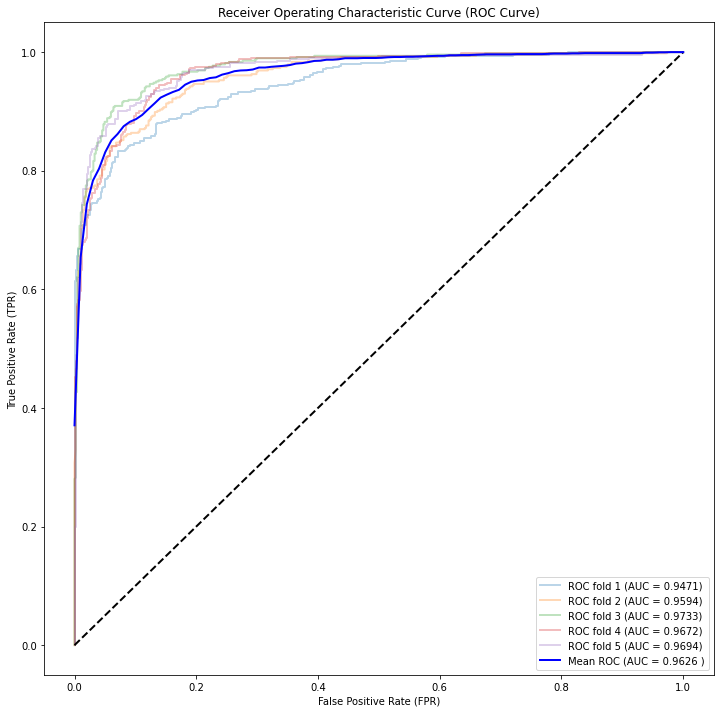

Accuracy [Each Fold]: [0.8371133804321289, 0.8865979313850403, 0.8804123997688293, 0.8711340427398682, 0.9103092551231384]
Accuracy: 0.8771
Sensitivity: 0.8763
Specificity: 0.8779
MCC: 0.7633
Precision: 0.8888


In [6]:
if __name__ == '__main__':
    config = tf.compat.v1.ConfigProto()

    config.gpu_options.allow_growth = True

    session = tf.compat.v1.Session(config=config)
    # X1 = np.load('process_data/train/lh_train.npy')
    data1 = np.load('data/Process_data/X444455555.npz')
    X1 = data1['x_train']
    X2 = data1['x_test']
    y_1 = pd.read_csv('data/Process_data/train/y_train.csv').to_numpy()
    y1 = labelEncoding(y_1, dtype=int)
    y_2 = pd.read_csv('data/Process_data/test/y_test.csv').to_numpy()
    y2 = labelEncoding(y_2,dtype=int)

    setEpochNumber     = 100 # Performed-welled in epoch 600.50
    setBatchSizeNumber = 32 #26，32
    ####################################################

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    Accuracy = []
    Sensitivity = []
    Specificity = []
    Precision = []
    MCC = []

    # ROC Curve:
    fig1 = plt.figure(figsize=[12,12])

    TPR = []
    meanFPR = np.linspace(0, 1, 100)

    i = 1

    names = ['first']
    name=names[0]
    nn = 1
    
    for train, test in cv.split(y1):

        # Compile Model:
        model = model1()
        model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        
        filepath = 'my_model2/our_model_4X_test_mul/%sModel%d.tf' % (name,nn)
        
#         filepath = 'my_model/our_model_7_test/%sModel%d.h5' % (name,nn)
        
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
        callbacks_list = [checkpoint]
        back = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
        # Run Model:
        results = model.fit(x=[X1[train,:]],
                            y=y1[train,:],
                            validation_data=([X1[test,:]],y1[test,:]),
                            batch_size=setBatchSizeNumber, epochs=setEpochNumber,
                            verbose=1,
                            callbacks=[callbacks_list, back])
        model.save('my_model2/our_model_4X_test_mul/%sModel%d.h5' % (name,nn))


        nn += 1
        accuracy = model.evaluate(x=[X2],y=y2 )
        Accuracy.append(accuracy[1])

        # Performance Metices:
        Yactual = y_2
        Yp = model.predict([X2])
        v = Yp
        Yp = Yp.argmax(axis=1)

        CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
        TN, FP, FN, TP = CM.ravel()

        MCC.append(matthews_corrcoef(y_true=Yactual, y_pred=Yp))
        Sensitivity.append( TP / (TP + FN) )
        Specificity.append( TN / (TN + FP) )
        Precision.append(precision_score(y_true=Yactual, y_pred=Yp))

        # ROC Curve
        fpr, tpr, _ = roc_curve(Yactual, v[:,1])
        TPR.append(interp(meanFPR, fpr, tpr))
        rocauc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, rocauc))
        i= i+1

        # Performance Plot
#         print('#################################################')
#         print('Fold\'s Accuracy: {:.2f}'.format(accuracy[1]*100.0))
#         lossPlot(results)
#         accuracyPlot(results)
#         print('#################################################')

        print('AUC:',rocauc)
        print('Accuracy:',Accuracy)
        print('Sensitivity: ',Sensitivity)
        print('Specificity: ',Specificity)
        print('MCC:',MCC)
        print('Precision: ',Precision)
        
        

    #end-for

    rocPlot(TPR, meanFPR)

    print('Accuracy [Each Fold]: {}'.format(Accuracy))
    print('Accuracy: {:.4f}'.format(np.sum(Accuracy)/5.0))
    print('Sensitivity: {0:.4f}'.format(np.sum(Sensitivity)/5.00))
    print('Specificity: {0:.4f}'.format(np.sum(Specificity)/5.00))
    print('MCC: {0:.4f}'.format(np.sum(MCC)/5.00))
    print('Precision: {0:.4f}'.format(np.sum(Precision)/5.00))